## Setups: Clone repo, install libs, get data and make it usable
This may take some time...

> After finishing you might need to restart the runtime




## Install the libs

In [12]:
!pip install -q omegaconf audiomentations nlpaug

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.6/82.6 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 32.8 MB/s eta 0:00:00


In [13]:
!sudo apt install imagemagick
!pip install wand

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-droid-fallback fonts-noto-mono fonts-urw-base35 ghostscript gsfonts
  imagemagick-6-common imagemagick-6.q16 libdjvulibre-text libdjvulibre21
  libfftw3-double3 libgs9 libgs9-common libidn12 libijs-0.35 libjbig2dec0
  libjxr-tools libjxr0 liblqr-1-0 libmagickcore-6.q16-6
  libmagickcore-6.q16-6-extra libmagickwand-6.q16-6 libnetpbm10
  libwmflite-0.2-7 netpbm poppler-data
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf fonts-texgyre
  ghostscript-x imagemagick-doc autotrace cups-bsd | lpr | lprng enscript gimp
  gnuplot grads hp2xx html2ps libwmf-bin mplayer povray radiance sane-utils
  texlive-base-bin transfig ufraw-batch libfftw3-bin libfftw3-dev inkscape
  poppler-utils fonts-japanese-mincho | fonts-ipafont-mincho
  fonts-japanese-gothic | fonts-ipafont-gothic fonts-arphic-ukai
  fonts-arphic-uming fon

## Get repo

In [14]:
!git clone https://github.com/bezirganyan/LUMA.git

Cloning into 'LUMA'...
remote: Enumerating objects: 391, done.
remote: Counting objects: 100% (145/145), done.
remote: Compressing objects: 100% (120/120), done.
remote: Total 391 (delta 72), reused 78 (delta 25), pack-reused 246 (from 1)
Receiving objects: 100% (391/391), 2.06 MiB | 16.71 MiB/s, done.
Resolving deltas: 100% (229/229), done.


In [15]:
cd LUMA

/content/LUMA


In [16]:
!git config --global credential.helper store

In [17]:
!git lfs install

Updated git hooks.
Git LFS initialized.


### Get image data

In [19]:
mkdir data

In [20]:
!wget https://huggingface.co/datasets/bezirganyan/LUMA/resolve/main/edm_images.pickle -P ./data

--2024-12-20 18:00:51--  https://huggingface.co/datasets/bezirganyan/LUMA/resolve/main/edm_images.pickle
Resolving huggingface.co (huggingface.co)... 3.171.171.104, 3.171.171.6, 3.171.171.128, ...
Connecting to huggingface.co (huggingface.co)|3.171.171.104|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs-us-1.hf.co/repos/91/6d/916d91190e01032d29384546038721047bf54420deab1052a661200d4b695d3d/6154eebb09549ebc085e12e26b2e3ec119d31f0a12dc0e5993d1e7546b0e3767?response-content-disposition=inline%3B+filename*%3DUTF-8%27%27edm_images.pickle%3B+filename%3D%22edm_images.pickle%22%3B&Expires=1734976851&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTczNDk3Njg1MX19LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy11cy0xLmhmLmNvL3JlcG9zLzkxLzZkLzkxNmQ5MTE5MGUwMTAzMmQyOTM4NDU0NjAzODcyMTA0N2JmNTQ0MjBkZWFiMTA1MmE2NjEyMDBkNGI2OTVkM2QvNjE1NGVlYmIwOTU0OWViYzA4NWUxMmUyNmIyZTNlYzExOWQzMWYwYTEyZGMwZTU5OTNkMWU3NTQ2YjBlMzc2Nz9yZXNwb25z

## Get the paligemma captions

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!cp /content/drive/MyDrive/LUMA/paligemma_full_results.json /content/

In [3]:
import pandas as pd
import json

# Load the JSON data
with open('/content/paligemma_full_results.json', 'r') as f:
    data = json.load(f)

# Convert the JSON data to a DataFrame
captions = pd.DataFrame.from_dict(data, orient='index')

# Set 'original_index' as the index
captions = captions.set_index('original_index')

# Split 'generated_text' into 'prompt' and 'description'
captions[['prompt', 'description']] = captions['generated_text'].str.split('\n', n=1, expand=True)
captions.drop(columns=['generated_text'], inplace=True)

# Display the DataFrame
captions.head()

,prompt,description
original_index,,
0,Describe the content of this image in detail,"Sorry, as a base VLM I am not trained to answe..."
1,Describe the content of this image in detail,A blurry photo of a white truck with a yellow ...
2,Describe the content of this image in detail,A blurry photo of a truck with a ramp extended...
3,Describe the content of this image in detail,"Sorry, as a base VLM I am not trained to answe..."
4,Describe the content of this image in detail,A brown horse stands proudly in a field of gre...


## Captions details

In [4]:
len(captions[captions.description != 'Sorry, as a base VLM I am not trained to answer this question.'])/len(captions)

0.4426655127650368

In [31]:
captions_sorted = captions.sort_values(by='description', key=lambda x: x.str.len())
captions_sorted = captions_sorted.reset_index()

In [43]:
captions_sorted.head()

,original_index,prompt,description
0,4553,Describe the content of this image in detail,boat
1,1171,Describe the content of this image in detail,blue truck
2,8734,Describe the content of this image in detail,blue truck
3,4352,Describe the content of this image in detail,yellow truck
4,270,Describe the content of this image in detail,unanswerable


In [11]:
len(captions)

9244

In [45]:
# Create a new DataFrame by filtering the original DataFrame
clean_df = captions[
    (captions['description'].str.len() >= 35) &
    (captions['description'] != 'Sorry, as a base VLM I am not trained to answer this question.')
]
clean_df.drop(columns=['prompt'], inplace=True)

# Display the new DataFrame
clean_df.head()

<ipython-input-45-96dce0be490c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df.drop(columns=['prompt'], inplace=True)


,description
original_index,
1,A blurry photo of a white truck with a yellow ...
2,A blurry photo of a truck with a ramp extended...
4,A brown horse stands proudly in a field of gre...
7,A blurry image of a man riding a brown horse o...
8,A blurry photo of a horse and a cow in a field...


In [46]:
clean_df.to_csv('/content/drive/MyDrive/LUMA/clean_captions.csv')

# Image data is here

In [21]:
from get_unprocessed_data import generate_image_modality
import matplotlib.pyplot as plt
from textwrap import wrap

images = generate_image_modality('wawa','wiwa')

[*] Generating image modality
[-] Image data not found at wawa
[-] Image data not found at wawa
[*] Loading CIFAR-50 dataset


cifar-10-python.tar.gz: 171MB [00:02, 68.5MB/s]                           


Downloaded CIFAR-10


cifar-100-python.tar.gz: 169MB [00:02, 70.2MB/s]                           


Downloaded CIFAR-100
[+] CIFAR-50 dataset loaded successfully!
[*] Loading CIFAR-100 dataset
[+] CIFAR-100 dataset loaded successfully!
[*] Loading generated CIFAR-100 dataset
[+] Loaded generated CIFAR-100 dataset loaded successfully!
[+] Image data saved successfully!


In [23]:
def plot_examples_with_description(examples, images, title, row_idx):
    """
    Plot images with their descriptions, ensuring proper text wrapping and alignment.

    Parameters:
    examples: DataFrame containing the captions
    images: DataFrame containing the images
    title: String for the subplot title
    row_idx: Row index (0 or 1) for positioning the subplots
    """
    for idx, (index, row) in enumerate(examples.iterrows()):
        image_data = images.loc[index]['image']
        label = images.loc[index]['label']
        description = row['description']
        print(description)

        # Calculate subplot positions
        # For row 0: positions 1 and 2
        # For row 1: positions 3 and 4
        image_pos = 2 * row_idx + 1
        text_pos = 2 * row_idx + 2

        # Image on the left
        ax_image = plt.subplot(2, 2, image_pos)
        ax_image.imshow(image_data)
        ax_image.set_title(f"{title}:\n{label}")
        ax_image.axis('off')

        # Description on the right
        ax_text = plt.subplot(2, 2, text_pos)

        # Wrap text to fit width
        wrapped_text = '\n'.join(wrap(description, width=40))

        # Position text with proper alignment and wrapping
        ax_text.text(0.1, 0.5, wrapped_text,
                    fontsize=10,
                    ha='left',  # Left align the text
                    va='center',
                    transform=ax_text.transAxes,
                    linespacing=1.5)  # Increase line spacing for readability
        ax_text.axis('off')

def create_comparison_plot(captions, images):
    """
    Create a comparison plot of success and failure cases.

    Parameters:
    captions: DataFrame containing the captions
    images: DataFrame containing the images
    """
    # Filter captions
    captions_filtered = captions[captions.description != 'Sorry, as a base VLM I am not trained to answer this question.']
    success_examples = captions_filtered.sample(1)
    failure_examples = captions[captions.description == 'Sorry, as a base VLM I am not trained to answer this question.'].sample(1)

    # Create figure
    plt.figure(figsize=(8, 8))
    plt.suptitle("Image Captionning Examples Using PaliGemma: Success vs. Failure", fontsize=12, y=1.02)

    # Plot examples using row indices (0 for first row, 1 for second row)
    plot_examples_with_description(success_examples, images, "Success", 0)  # First row
    plot_examples_with_description(failure_examples, images, "Failure", 1)  # Second row

    # Adjust layout
    plt.tight_layout()
    return plt.gcf()

A blurry photo of a bird's head, showcasing a white beak, black eye, and a long neck. The bird's head is in the foreground, with a blurry background of green grass and trees. The photo is taken in the daytime, and the bird appears to be standing in the grass. The bird's neck is long, and its head is tilted back, as if looking at the camera.
Sorry, as a base VLM I am not trained to answer this question.


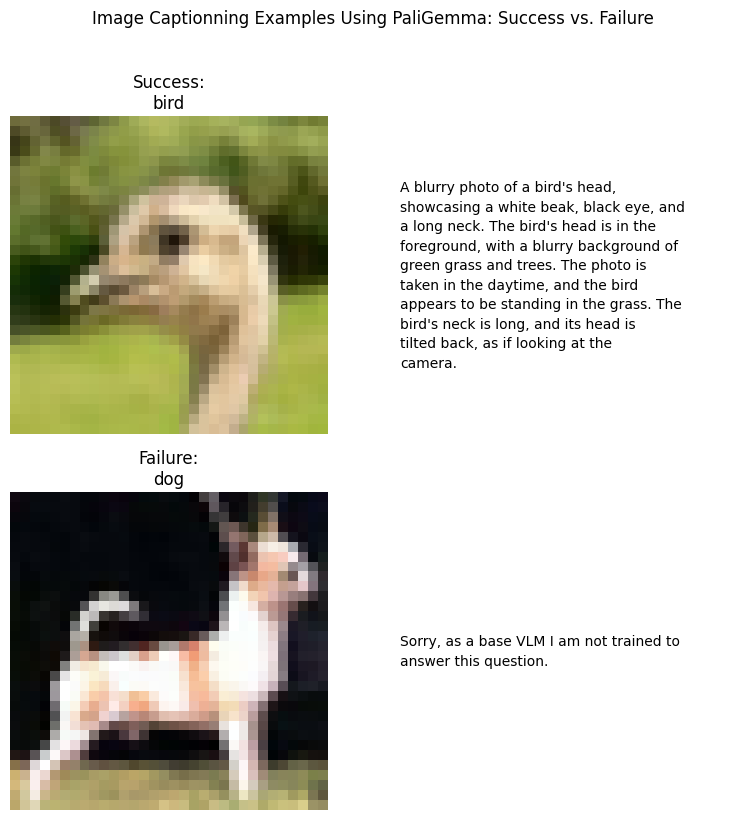

In [26]:
# Example usage:
fig = create_comparison_plot(captions, images)
plt.show()